In [1]:
include("../src/HSVGP.jl")
using .HSVGP

In [2]:
using Random, Zygote, PyPlot, LinearAlgebra, Statistics, Distributions

In [3]:
import Flux

In [4]:
rng = MersenneTwister(123);
N   = 50000
X   = 2 .* rand(rng, N)
X   = reshape(X,(N,1)); # Ensure X has two dimensions as required

lam = 6. * exp.(-2.0 .* X[:,1]) .* sin.(6*X[:,1]) .+ 10.;
Y   = [rand(Poisson(l),1)[1] for l in lam];

In [5]:
temp_model = HSVGP.SVGP_obj(X, float(Y), 10, "poisson");

In [6]:
# Package currently defaults to initialize based on nearest neighbor data
#     for poisson we want GP on log-lambda, so should initialize
#     the inducing points taking log of data (and adjusting for zeros)

temp_model.params.inducing_mean = log.(temp_model.params.inducing_mean .+ 1.0);


In [7]:
@time opt_trace, p_traces = HSVGP.fit_svgp!(temp_model, n_iters=3000, batch_size=100, return_param_traces = true);

 42.014147 seconds (169.68 M allocations: 13.315 GiB, 7.86% gc time)


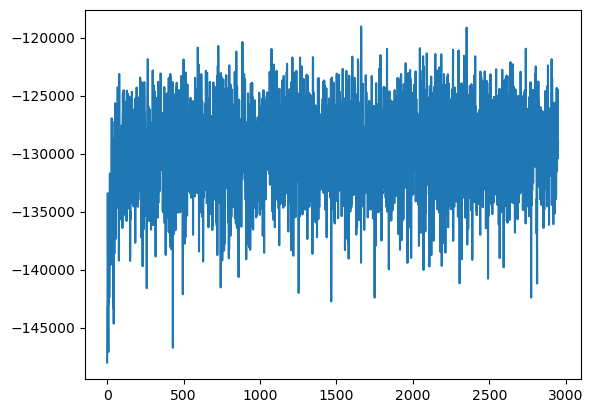

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17c134550>

In [8]:
PyPlot.plot(opt_trace[50:end])


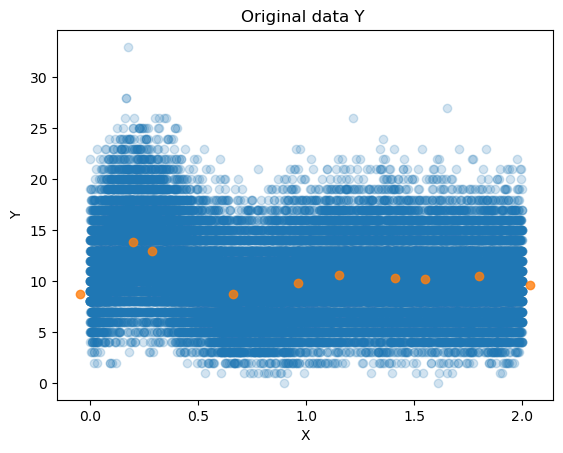

PyObject Text(0.5, 1.0, 'Original data Y ')

In [9]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, exp.(temp_model.params.inducing_mean), alpha=0.8)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")



In [10]:
pX = reshape([-0.:0.05:2.;],(41,1));

In [11]:
predY, predSD = HSVGP.pred_vgp(pX, temp_model);
err_sigma = 1.e-6;

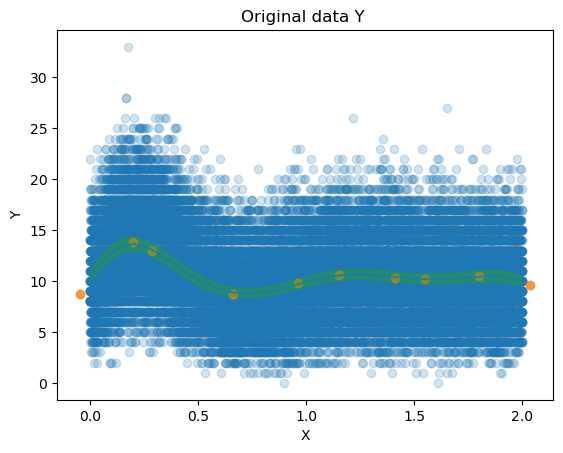

PyObject Text(0.5, 1.0, 'Original data Y ')

In [16]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, exp.(temp_model.params.inducing_mean), alpha=0.8)
PyPlot.plot(pX, exp.(predY), alpha=0.8)
PyPlot.fill_between(pX[:,1], exp.(predY + 2. .* sqrt.(predSD.^2 .+ err_sigma^2)), exp.(predY - 2. .* sqrt.(predSD.^2 .+ err_sigma^2)),alpha=.5)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")


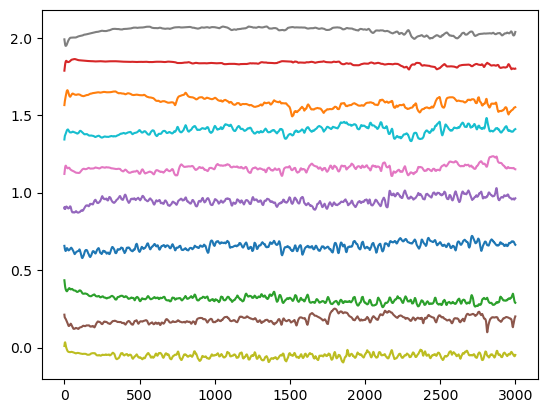

10-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17bd14400>
 PyObject <matplotlib.lines.Line2D object at 0x17bd144f0>
 PyObject <matplotlib.lines.Line2D object at 0x17bd145b0>
 PyObject <matplotlib.lines.Line2D object at 0x17bd14670>
 PyObject <matplotlib.lines.Line2D object at 0x17bd14730>
 PyObject <matplotlib.lines.Line2D object at 0x17bd147f0>
 PyObject <matplotlib.lines.Line2D object at 0x17bd148b0>
 PyObject <matplotlib.lines.Line2D object at 0x17bd14970>
 PyObject <matplotlib.lines.Line2D object at 0x17bd14a30>
 PyObject <matplotlib.lines.Line2D object at 0x17bd14af0>

In [13]:
PyPlot.plot(p_traces["inducing_locs"][:,:,1])


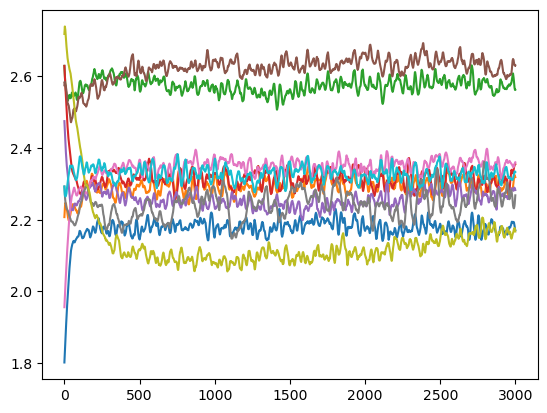

10-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17c69c1c0>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c2b0>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c370>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c430>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c4f0>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c5b0>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c670>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c730>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c7f0>
 PyObject <matplotlib.lines.Line2D object at 0x17c69c8b0>

In [14]:
PyPlot.plot(p_traces["inducing_mean"])


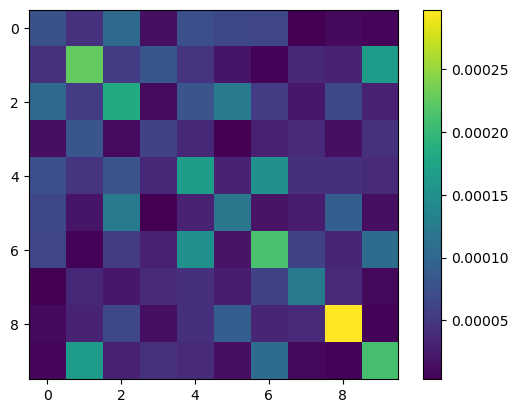

PyObject <matplotlib.colorbar.Colorbar object at 0x17caae670>

In [15]:
PyPlot.imshow(abs.(temp_model.params.inducing_L * temp_model.params.inducing_L'))
PyPlot.colorbar()

In [17]:
n = 50000
X = 4 .* rand(2*n) .- 1.
X = reshape(X,(n,2))

lam = (5. * sin.(1. * X[:,2]) .* sin.(2. * X[:,1]) .* exp.( -abs.(X[:,1] .- 1))) .^ 2;
Y   = [rand(Poisson(l),1)[1] for l in lam];

ni = 30


30

In [18]:
temp_model_2D = HSVGP.SVGP_obj(X, float(Y), ni, "poisson");

In [19]:
# Package currently defaults to initialize based on nearest neighbor data
#     for poisson we want GP on log-lambda, so should initialize
#     the inducing points taking log of data (and adjusting for zeros)
temp_model_2D.params.inducing_mean = log.(temp_model_2D.params.inducing_mean .+ 1.0);

In [20]:
@time opt_trace2D, p_traces = HSVGP.fit_svgp!(temp_model_2D, n_iters=2000, batch_size=100, return_param_traces = true);

 17.899684 seconds (118.33 M allocations: 11.381 GiB, 10.19% gc time)


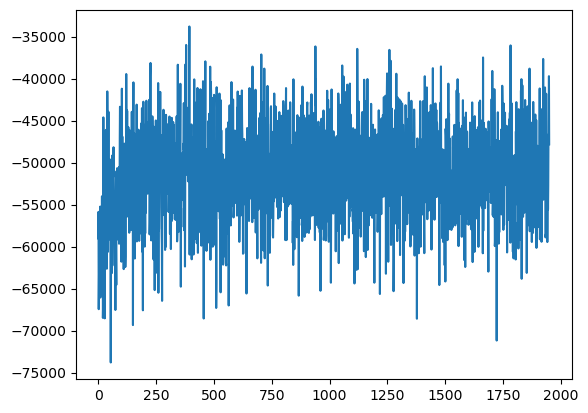

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x173581550>

In [21]:
PyPlot.plot(opt_trace2D[50:end])

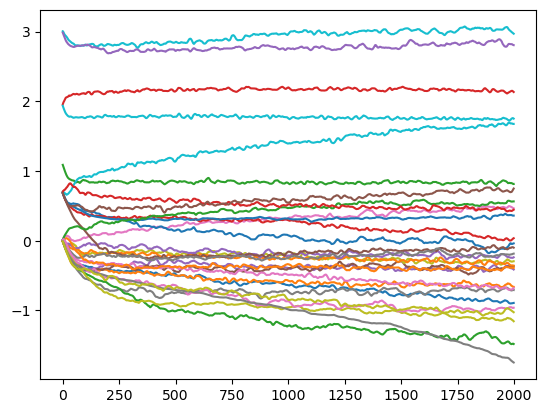

30-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x174dfc760>
 PyObject <matplotlib.lines.Line2D object at 0x174dfc850>
 PyObject <matplotlib.lines.Line2D object at 0x174dfc910>
 PyObject <matplotlib.lines.Line2D object at 0x174dfc9d0>
 PyObject <matplotlib.lines.Line2D object at 0x174dfca90>
 PyObject <matplotlib.lines.Line2D object at 0x174dfcb50>
 PyObject <matplotlib.lines.Line2D object at 0x174dfcc10>
 PyObject <matplotlib.lines.Line2D object at 0x174dfccd0>
 PyObject <matplotlib.lines.Line2D object at 0x174dfcd90>
 PyObject <matplotlib.lines.Line2D object at 0x174dfce50>
 PyObject <matplotlib.lines.Line2D object at 0x173aac9a0>
 PyObject <matplotlib.lines.Line2D object at 0x174dfcfa0>
 PyObject <matplotlib.lines.Line2D object at 0x174e070a0>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x174e07520>
 PyObject <matplotlib.lines.Line2D object at 0x174e075e0>
 PyObject <matplotlib.lines.Line2D object at 0x174e076a0>
 PyObject <matplotlib.lines.Line

In [22]:
PyPlot.plot(p_traces["inducing_mean"])


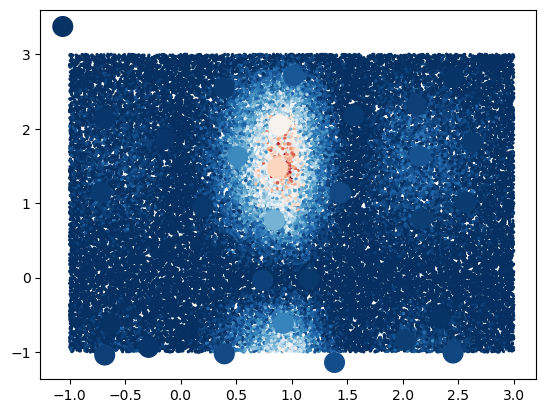

PyObject <matplotlib.collections.PathCollection object at 0x17560e190>

In [23]:
vmin = minimum(Y)
vmax = maximum(Y)

scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], 
    c = exp.(temp_model_2D.params.inducing_mean), 
    s=200,vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))

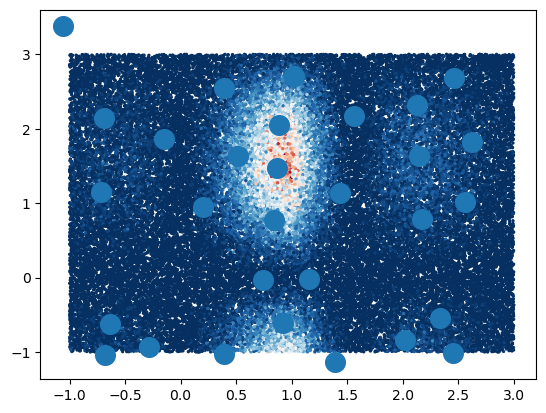

PyObject <matplotlib.collections.PathCollection object at 0x17249b1c0>

In [24]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

In [25]:
px = hcat([[x,y] for x in collect(-1:0.05:3) for y in collect(-1:0.05:3)]...)'
pn = size(px)[1]

6561

In [26]:
p_mean, p_sd = HSVGP.pred_vgp(px, temp_model_2D);

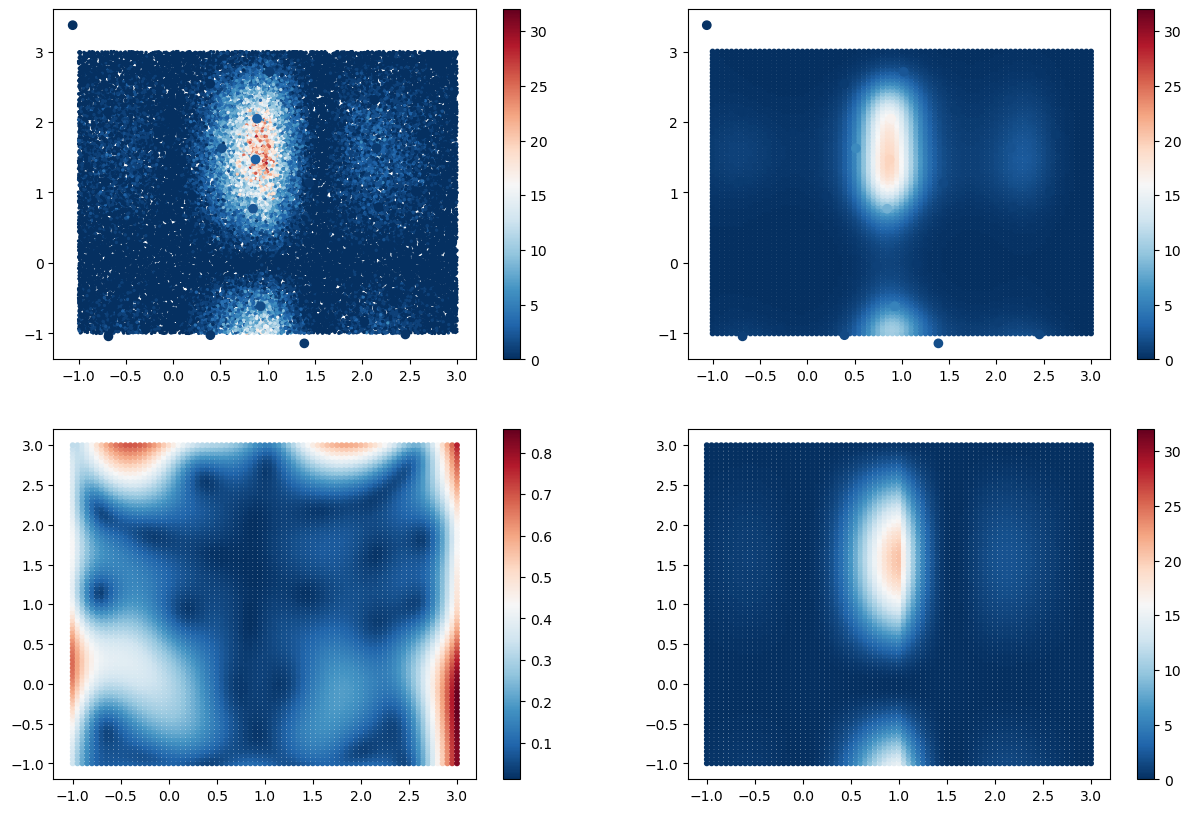

PyObject <matplotlib.colorbar.Colorbar object at 0x172bb1ca0>

In [27]:
fig = figure(figsize=(15,10))
subplot(221)
PyPlot.scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
PyPlot.scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    cmap=ColorMap("RdBu_r"),vmin=vmin,vmax=vmax)
PyPlot.colorbar()
subplot(222)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=exp.(p_mean),vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=exp.(temp_model_2D.params.inducing_mean),
    cmap=ColorMap("RdBu_r"),vmin=vmin,vmax=vmax)
PyPlot.colorbar()
subplot(223)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_sd,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()
subplot(224)
PyPlot.scatter(px[:,1],px[:,2],s=10,
    c=(5. * sin.(1. * px[:,2]) .* sin.(2. * px[:,1]) .* exp.( -abs.(px[:,1] .- 1))) .^ 2,
    vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()
